In [1]:
from IPython.display import clear_output
!pip install -q transformers accelerate bitsandbytes
!pip install -q python-docx python-pptx pytesseract pillow
!pip install -q pymupdf
!apt install -y tesseract-ocr
clear_output()

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"  # Small & fast model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

generator = pipeline("text-generation", model=model, tokenizer=tokenizer, device=0)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Device set to use cuda:0


In [4]:
from google.colab import files
uploaded = files.upload()  # You’ll upload here

Saving images (3).jpg to images (3).jpg


In [5]:
import fitz  # for PDF
from docx import Document
from pptx import Presentation
import pytesseract
from PIL import Image

def extract_text_from_pdf(path):
    doc = fitz.open(path)
    return "\n".join([page.get_text() for page in doc])

def extract_text_from_docx(path):
    doc = Document(path)
    return "\n".join([para.text for para in doc.paragraphs])

def extract_text_from_pptx(path):
    prs = Presentation(path)
    text = ""
    for slide in prs.slides:
        for shape in slide.shapes:
            if hasattr(shape, "text"):
                text += shape.text + "\n"
    return text

def extract_text_from_image(path):
    img = Image.open(path)
    return pytesseract.image_to_string(img)


In [6]:
import os

def auto_extract(file_path):
    if file_path.endswith(".pdf"):
        return extract_text_from_pdf(file_path)
    elif file_path.endswith(".docx"):
        return extract_text_from_docx(file_path)
    elif file_path.endswith(".pptx"):
        return extract_text_from_pptx(file_path)
    elif file_path.lower().endswith((".png", ".jpg", ".jpeg")):
        return extract_text_from_image(file_path)
    else:
        return "Unsupported file type."

uploaded_file_name = next(iter(uploaded))
text = auto_extract(uploaded_file_name)

print("Extracted text:", text)  # Preview first 1000 characters


Extracted text: VARIETY Cap of Liberty

 

etiope Ste

‘Avery of vintage bitershap cider
‘pple cating tore 1th ana ath
‘Centuries. Although ats best when
Dended witha sweet er vaney
tke Sweet Coppn or biterswoct
‘scloctons suena Ondine,
Yaring.on Ml ar remot Biter,
Cap af Libary il ake avery
peasant ide on i ow wh
fly ace, eters Nao

 

 

 

 



In [7]:
prompt = f"Summarize the following content:\n{text}"  # Adjust length as needed

response = generator(prompt, max_new_tokens=200, do_sample=True)
print(response[0]["generated_text"])


Summarize the following content:
VARIETY Cap of Liberty

 

etiope Ste

‘Avery of vintage bitershap cider
‘pple cating tore 1th ana ath
‘Centuries. Although ats best when
Dended witha sweet er vaney
tke Sweet Coppn or biterswoct
‘scloctons suena Ondine,
Yaring.on Ml ar remot Biter,
Cap af Libary il ake avery
peasant ide on i ow wh
fly ace, eters Nao

 

 

 

 
 <|system|>
Content: The text contains 15 sentences organized in 5 paragraphs with an overall length of 484 words. The text contains a minimum of 7 sentences with varying lengths. The content follows a set topic with clear and concise language suitable for academic and formal purposes. The content summarizes the main points made throughout the text while maintaining a clear and logical flow of ideas. The language, style, and tone are consistent throughout the text. The text is structured clearly, with appropriate headings and subheadings to assist readers with navigation.


In [10]:
from IPython.display import clear_output
!pip install opencv-python matplotlib
clear_output()

In [11]:
print(uploaded)

{'images (3).jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x12\x12\x15\x13\x13\x12\x16\x16\x15\x17\x18\x17\x18\x17\x18\x18\x18\x1a\x1b\x18\x18\x1d\x1a\x18\x19\x17\x18 \x18\x17\x1a(("\x18\x1b\'\x1b\x17\x18"1#%)+...\x17 494-8(-.+\x01\n\n\n\x0e\r\x0e\x1b\x10\x10\x1a-%\x1f%-//---0/------------------------------------------\xff\xc0\x00\x11\x08\x00\xba\x01\x0f\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x00\x03\x06\x02\x01\x07\xff\xc4\x00D\x10\x00\x02\x02\x00\x04\x03\x04\x05\x07\n\x06\x02\x03\x01\x00\x00\x01\x02\x03\x11\x00\x04\x12!\x05\x131\x06"AQ#2aq\x91\x14\x15S\x81\x93\xa1\xb134BRTrs\xb2\xd1\xd3\x16$b\x92\xc1\xf0\x82\xe1Cc\xf1\xa2\xff\xc4\x00\x1a\x01\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x04\x05\x03\x06\xff\xc4\x00)\x11\x01\x00\x01\x02\x04\x06\x02\x03\x00\x03\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11\x03\

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def denoise_image(image_path):
    # Load image
    image = cv2.imread(image_path)

    # Convert to RGB for displaying
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply different denoising techniques
    # 1. Gaussian Blur (for Gaussian noise)
    gaussian = cv2.GaussianBlur(image, (5, 5), 0)

    # 2. Median Blur (for Salt & Pepper noise)
    median = cv2.medianBlur(image, 5)

    # 3. Bilateral Filter (preserves edges)
    bilateral = cv2.bilateralFilter(image, 9, 75, 75)

    # 4. Fast Non-Local Means Denoising (best overall)
    fast_denoised = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

    # Display results
    titles = ['Original', 'Gaussian Blur', 'Median Blur', 'Bilateral Filter', 'Fast NLM Denoising']
    images = [image_rgb,
              cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB),
              cv2.cvtColor(median, cv2.COLOR_BGR2RGB),
              cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB),
              cv2.cvtColor(fast_denoised, cv2.COLOR_BGR2RGB)]

    plt.figure(figsize=(15, 10))
    for i in range(5):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


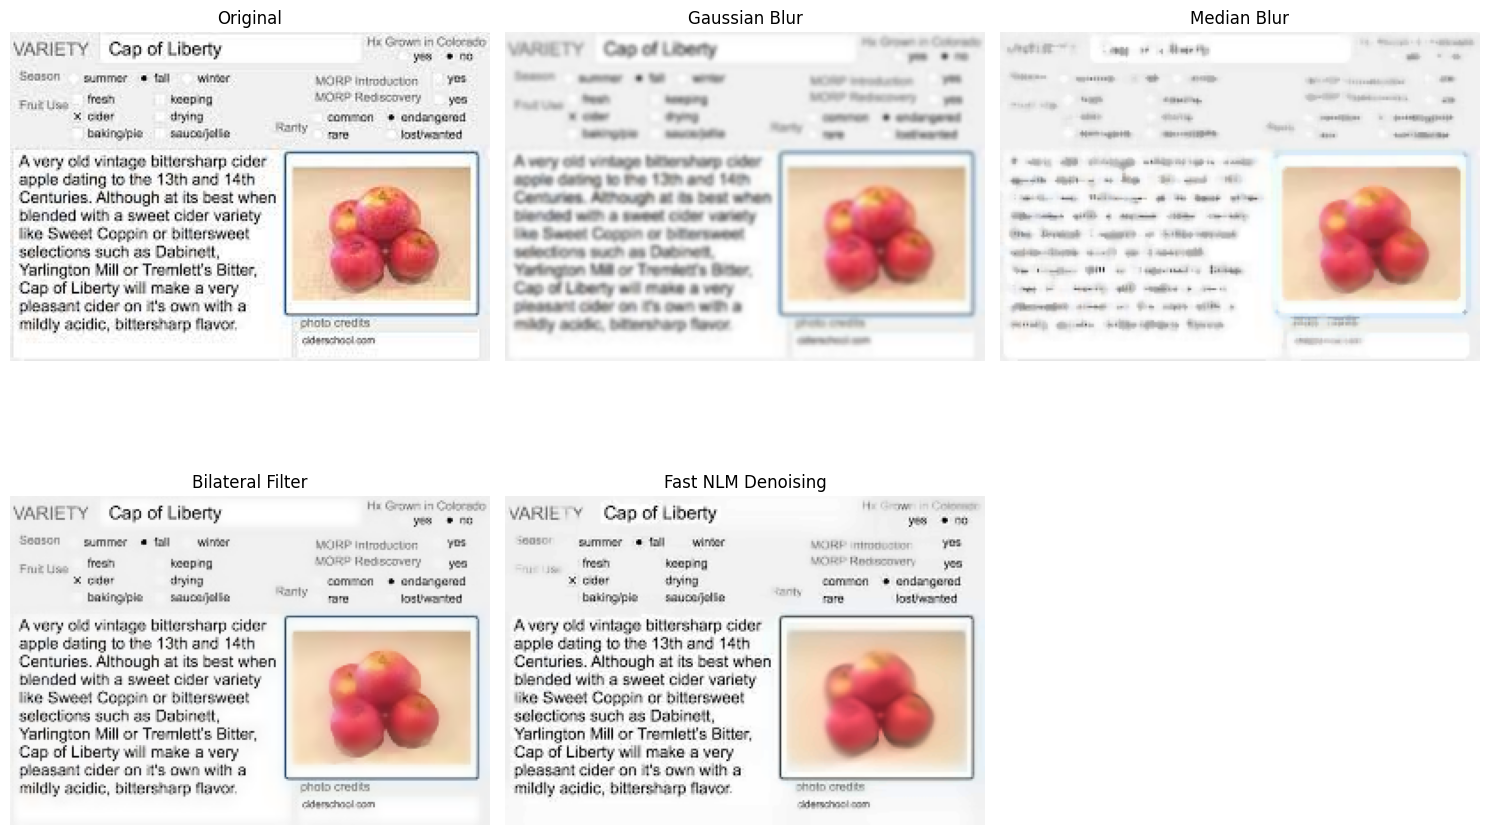

In [16]:
denoise_image("/content/images (3).jpg")


In [18]:
txt=extract_text_from_image("/content/sddefault.jpg")

In [19]:
print(txt)

 

HRM Meaning and Definition

 

Human Resource Management is also a
function of management, concerned with
hiring, motivating and maintaining
people in an organisation.

It focuses on people in the organisation.

